##Are there correlations between family planning access and maternal 
healthcare- seeking behavior, such as antenatal care attendance and 
skilled birth attendance?  

In [1]:
import pandas as pd
import plotly.express as px
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px


# Load the CSV files into DataFrames
df1 = pd.read_csv('Output/isabel.csv')
df2 = pd.read_csv('Output/family_planning_cleaned.csv')

In [2]:
# Display the first few rows of each DataFrame 
print("Antenatal Care Data:")
df1.head()


Antenatal Care Data:


,IndicatorCode,Indicator,ParentLocation,Location,Age-group,Anatal_care%,FactComments,Starting_year,Ending_year,Period_Range
0,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,NaN,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023
1,WHS4_154,Antenatal care coverage - at least four visits...,Africa,Senegal,NaN,68.4,DHS 2023 (DHS Continuous) Key indicators.,2021,2023,2021-2023
2,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Tunisia,NaN,79,MICS 2023 (snaphots),2021,2023,2021-2023
3,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Jordan,NaN,93.1,PFHS 2023 (key indicators).,2021,2023,2021-2023
4,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Yemen,NaN,32.4,MICS 2022-2023.,2020,2023,2021-2023


In [3]:
print("\nFamily Planning Data:")
df2.head()


Family Planning Data:


,IndicatorCode,Indicator,Patents_Continent_Code,ParentLocation_Continent,Country_Code,Country,Gender,Age_Group,Planning_Value_Rate,FactComments,Language_Code,Starting_Year,Year_Ending,Year_Group,Year_Period_Range
0,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,UGA,Uganda,Female,15-49 years,65.5,The global indicator represents all women of r...,EN,2021,2021,2021-2021,2021-2023
1,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,NER,Niger,Female,15-49 years,36.9,Niger 2021 PMA Survey Phase 1,EN,2020,2021,2020-2021,2021-2023
2,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,BFA,Burkina Faso,Female,15-49 years,58.2,Burkina Faso 2021 PMA Survey Phase 2,EN,2020,2021,2020-2021,2021-2023
3,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,WPR,Western Pacific,VNM,Viet Nam,Female,15-49 years,72.1,The global indicator represents all women of r...,EN,2020,2021,2020-2021,2021-2023
4,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,CIV,Cote d'Ivoire,Female,15-49 years,46.1,Côte d'Ivoire 2020 PMA Survey Phase 1,EN,2020,2020,2020-2020,2018-2020


In [4]:

df2.rename(columns={'Year_Period_Range': 'Period_Range'}, inplace=True)

# Print the columns of df2 to verify the change
print(df2.columns)


Index(['IndicatorCode', 'Indicator', 'Patents_Continent_Code',
       'ParentLocation_Continent', 'Country_Code', 'Country', 'Gender',
       'Age_Group', 'Planning_Value_Rate', 'FactComments', 'Language_Code',
       'Starting_Year', 'Year_Ending', 'Year_Group', 'Period_Range'],
      dtype='object')


In [5]:
print("\nFamily Planning Data:")
df2.head()


Family Planning Data:


,IndicatorCode,Indicator,Patents_Continent_Code,ParentLocation_Continent,Country_Code,Country,Gender,Age_Group,Planning_Value_Rate,FactComments,Language_Code,Starting_Year,Year_Ending,Year_Group,Period_Range
0,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,UGA,Uganda,Female,15-49 years,65.5,The global indicator represents all women of r...,EN,2021,2021,2021-2021,2021-2023
1,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,NER,Niger,Female,15-49 years,36.9,Niger 2021 PMA Survey Phase 1,EN,2020,2021,2020-2021,2021-2023
2,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,BFA,Burkina Faso,Female,15-49 years,58.2,Burkina Faso 2021 PMA Survey Phase 2,EN,2020,2021,2020-2021,2021-2023
3,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,WPR,Western Pacific,VNM,Viet Nam,Female,15-49 years,72.1,The global indicator represents all women of r...,EN,2020,2021,2020-2021,2021-2023
4,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,CIV,Cote d'Ivoire,Female,15-49 years,46.1,Côte d'Ivoire 2020 PMA Survey Phase 1,EN,2020,2020,2020-2020,2018-2020


In [6]:
# Merge df1 and df2 on 'period_range'
merged_df = pd.merge(df1, df2, on='Period_Range', how='inner')

# Display the merged DataFrame
print("\nMerged DataFrame:")
merged_df.head()


Merged DataFrame:


,IndicatorCode_x,Indicator_x,ParentLocation,Location,Age-group,Anatal_care%,FactComments_x,Starting_year,Ending_year,Period_Range,...,Country_Code,Country,Gender,Age_Group,Planning_Value_Rate,FactComments_y,Language_Code,Starting_Year,Year_Ending,Year_Group
0,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,NaN,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,...,UGA,Uganda,Female,15-49 years,65.5,The global indicator represents all women of r...,EN,2021,2021,2021-2021
1,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,NaN,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,...,NER,Niger,Female,15-49 years,36.9,Niger 2021 PMA Survey Phase 1,EN,2020,2021,2020-2021
2,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,NaN,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,...,BFA,Burkina Faso,Female,15-49 years,58.2,Burkina Faso 2021 PMA Survey Phase 2,EN,2020,2021,2020-2021
3,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,NaN,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,...,VNM,Viet Nam,Female,15-49 years,72.1,The global indicator represents all women of r...,EN,2020,2021,2020-2021
4,WHS4_154,Antenatal care coverage - at least four visits...,Africa,Senegal,NaN,68.4,DHS 2023 (DHS Continuous) Key indicators.,2021,2023,2021-2023,...,UGA,Uganda,Female,15-49 years,65.5,The global indicator represents all women of r...,EN,2021,2021,2021-2021


In [7]:
# Drop columns with NaN values
merged_df.dropna(axis=1, inplace=True)

In [8]:
print("\nMerged DataFrame:")
merged_df.head()


Merged DataFrame:


,IndicatorCode_x,Indicator_x,ParentLocation,Location,Anatal_care%,FactComments_x,Starting_year,Ending_year,Period_Range,IndicatorCode_y,...,Country_Code,Country,Gender,Age_Group,Planning_Value_Rate,FactComments_y,Language_Code,Starting_Year,Year_Ending,Year_Group
0,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,UGA,Uganda,Female,15-49 years,65.5,The global indicator represents all women of r...,EN,2021,2021,2021-2021
1,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,NER,Niger,Female,15-49 years,36.9,Niger 2021 PMA Survey Phase 1,EN,2020,2021,2020-2021
2,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,BFA,Burkina Faso,Female,15-49 years,58.2,Burkina Faso 2021 PMA Survey Phase 2,EN,2020,2021,2020-2021
3,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,VNM,Viet Nam,Female,15-49 years,72.1,The global indicator represents all women of r...,EN,2020,2021,2020-2021
4,WHS4_154,Antenatal care coverage - at least four visits...,Africa,Senegal,68.4,DHS 2023 (DHS Continuous) Key indicators.,2021,2023,2021-2023,SDGFPALL,...,UGA,Uganda,Female,15-49 years,65.5,The global indicator represents all women of r...,EN,2021,2021,2021-2021


In [9]:
# Extracting specific columns
subset_df = merged_df[['Period_Range', 'Anatal_care%', 'Planning_Value_Rate']]


In [14]:
subset_df.head()

,Period_Range,Anatal_care%,Planning_Value_Rate
0,2021-2023,88.8,65.5
1,2021-2023,88.8,36.9
2,2021-2023,88.8,58.2
3,2021-2023,88.8,72.1
4,2021-2023,68.4,65.5


In [15]:


# Example line plot 
fig = px.line(subset_df, x='Period_Range', y='Anatal_care%', title='Line Plot of Period over Rates')
fig.show()

In [20]:
# Example line plot 
fig = px.line(subset_df, x='Period_Range', y='Planning_Value_Rate', title='Line Plot of Period over Rates')
fig.show()

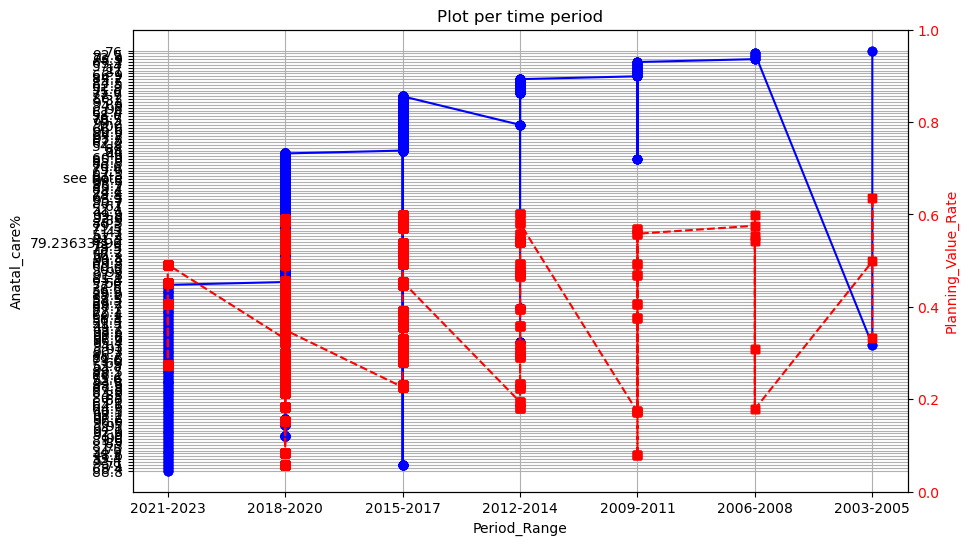

In [18]:
# Example plot with two y-values 
plt.figure(figsize=(10, 6))

# Plotting first y-value (Column2) against Column1
plt.plot(subset_df['Period_Range'], subset_df['Anatal_care%'], label='Anatal_care%', marker='o', linestyle='-', color='b')

# Plotting second y-value (Column3) against Column1 on secondary y-axis
plt.plot(subset_df['Period_Range'], subset_df['Planning_Value_Rate'], label='Planning_Value_Rate', marker='s', linestyle='--', color='r')

plt.xlabel('Period_Range')
plt.ylabel('Anatal_care%')
plt.title('Plot per time period')
plt.grid(True)
plt.legend()

# Adding secondary y-axis for Column3
plt.twinx()
plt.ylabel('Planning_Value_Rate', color='r')
plt.tick_params(axis='y', labelcolor='r')

plt.show()

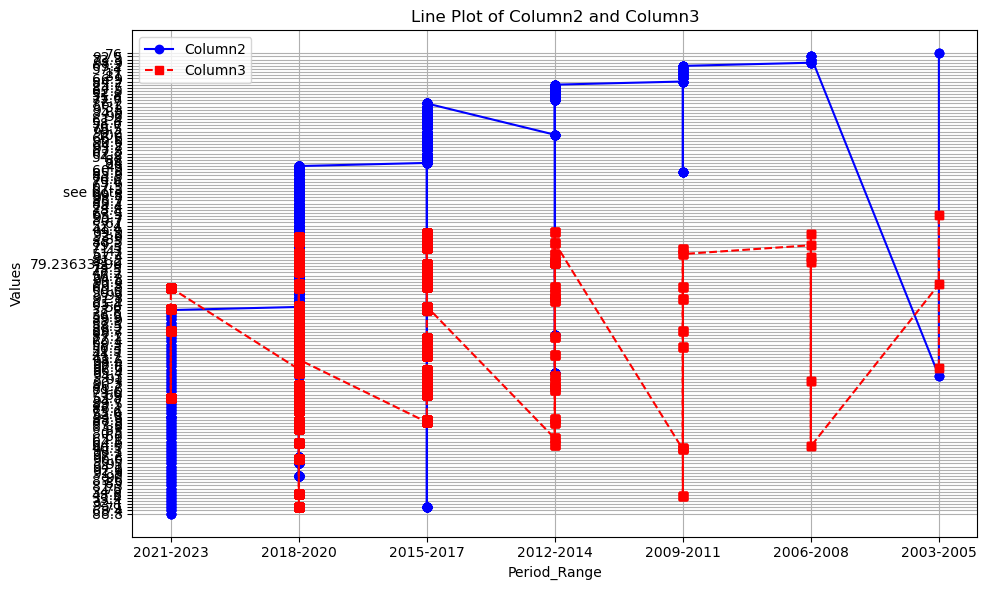

In [19]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting Column2 against Column1
ax.plot(subset_df['Period_Range'], subset_df['Anatal_care%'], marker='o', linestyle='-', color='b', label='Column2')

# Plotting Column3 against Column1
ax.plot(subset_df['Period_Range'], subset_df['Planning_Value_Rate'], marker='s', linestyle='--', color='r', label='Column3')

# Adding labels and title
ax.set_xlabel('Period_Range')
ax.set_ylabel('Values')
ax.set_title('Line Plot of Column2 and Column3')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()